In [2]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [4]:
df = pd.read_csv('data/calories_data.csv')
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [5]:
X = df.drop(columns=['Calories'],axis=1)

In [6]:
X.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [7]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['Gender'].unique())

Categories in 'gender' variable:      ['male' 'female']


In [8]:
y = df['Calories']

In [9]:
y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

In [10]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [11]:
X = preprocessor.fit_transform(X)

In [12]:
X.shape

(15000, 9)

In [22]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35,random_state=42)
X_train.shape, X_test.shape

((9750, 9), (5250, 9))

In [23]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [24]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 11.2190
- Mean Absolute Error: 8.2880
- R2 Score: 0.9675
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 11.4826
- Mean Absolute Error: 8.4188
- R2 Score: 0.9666


Lasso
Model performance for Training set
- Root Mean Squared Error: 12.2143
- Mean Absolute Error: 8.9919
- R2 Score: 0.9615
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 12.5314
- Mean Absolute Error: 9.1455
- R2 Score: 0.9602


Ridge
Model performance for Training set
- Root Mean Squared Error: 11.2190
- Mean Absolute Error: 8.2867
- R2 Score: 0.9675
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 11.4832
- Mean Absolute Error: 8.4177
- R2 Score: 0.9666


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7606
- Mean Absolute Error: 4.2161
- R2 Score: 0.9914
-----------------

In [25]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"])

,Model Name,R2_Score
1,Lasso,0.960236
8,AdaBoost Regressor,0.966484
2,Ridge,0.966610
0,Linear Regression,0.966614
3,K-Neighbors Regressor,0.987293
4,Decision Tree,0.991302
5,Random Forest Regressor,0.997524
6,XGBRegressor,0.998639
7,CatBoosting Regressor,0.999842


In [27]:
catboost_model = CatBoostRegressor()
catboost_model = catboost_model.fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

Learning rate set to 0.058674
0:	learn: 58.9901041	total: 4.21ms	remaining: 4.21s
1:	learn: 55.9560822	total: 11.3ms	remaining: 5.64s
2:	learn: 53.0347531	total: 16.5ms	remaining: 5.49s
3:	learn: 50.2942143	total: 21.8ms	remaining: 5.43s
4:	learn: 47.7827835	total: 28.4ms	remaining: 5.65s
5:	learn: 45.3613163	total: 32.5ms	remaining: 5.39s
6:	learn: 43.0269126	total: 36.2ms	remaining: 5.14s
7:	learn: 40.8506382	total: 45.5ms	remaining: 5.64s
8:	learn: 38.7805131	total: 51.2ms	remaining: 5.64s
9:	learn: 36.8774119	total: 60.2ms	remaining: 5.96s
10:	learn: 35.0107825	total: 65.2ms	remaining: 5.86s
11:	learn: 33.3472456	total: 69.1ms	remaining: 5.69s
12:	learn: 31.6688545	total: 77.5ms	remaining: 5.89s
13:	learn: 30.1517541	total: 81.4ms	remaining: 5.73s
14:	learn: 28.6692842	total: 84.8ms	remaining: 5.57s
15:	learn: 27.2319874	total: 89.6ms	remaining: 5.51s
16:	learn: 25.9456763	total: 95ms	remaining: 5.49s
17:	learn: 24.7498762	total: 103ms	remaining: 5.61s
18:	learn: 23.5492355	total: 

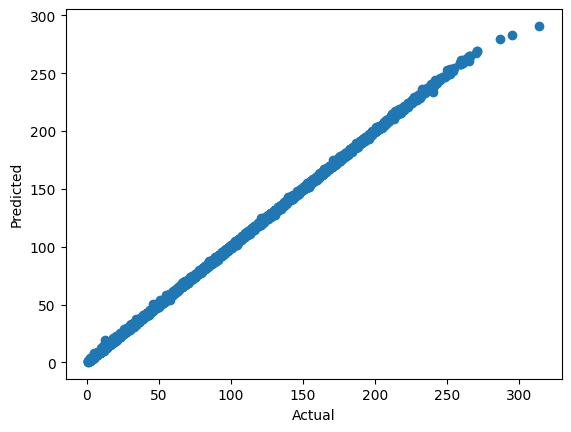

In [28]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

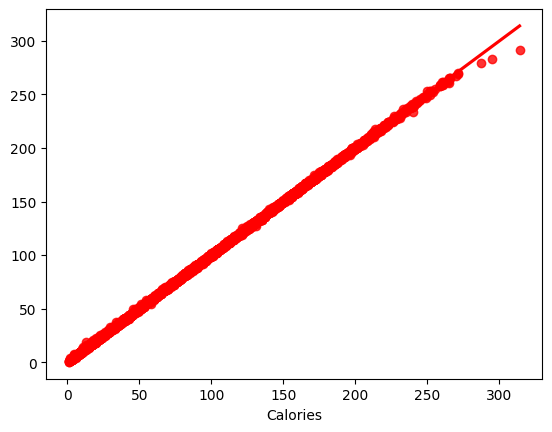

In [29]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [30]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
11499,173.0,172.571664,0.428336
6475,189.0,189.630679,-0.630679
13167,53.0,53.442076,-0.442076
862,161.0,161.515507,-0.515507
5970,226.0,225.022903,0.977097
...,...,...,...
9755,1.0,1.210416,-0.210416
11353,58.0,59.065077,-1.065077
10252,104.0,104.445925,-0.445925
14961,21.0,21.551587,-0.551587
